#### In this assignment we are trying to find whether the data for each column is Normal or rayleigh distribution, using maximum likelihood estimation,
##### We can add more functions gradually

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Used for calculating theoretical value
from scipy.special import factorial
import scipy.stats as stats


In [2]:
df = pd.read_csv("data/tumor_diagnose.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df = df.drop('id', 1)

In [6]:
df = df.drop('Unnamed: 32', 1)

In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df.shape

(569, 31)

In [10]:
def normal_mu(df_column):
    n = df_column.shape[0]
    return np.sum(df_column) / n

In [11]:
normal_mu(df['radius_mean'])

14.127291739894552

In [12]:
def normal_sigma(df_column, mu):
    n = df_column.shape[0]
    return np.sqrt((np.sum((df_column - mu)**2)/n))

In [13]:
normal_sigma(df['radius_mean'], 14.127291739894552)

3.520950760711062

In [36]:
def likelihood_normal_manual(df_column):
    n = df_column.shape[0]
    mu = normal_mu(df_column)
    sigma = normal_sigma(df_column, mu)
    #first_term = -1 * n * np.log(2*math.pi) / 2
    #second_term = -1 * n * np.log(sigma)
    #third_term = -1 * n * np.sum((df_column-mu)**2) / (2*sigma**2)
    #return first_term + second_term + third_term
    return np.sum(stats.norm.logpdf(df_column, loc=mu,scale=sigma))

In [37]:
likelihood_normal_manual(df['radius_mean'])

-1523.5939960376159

In [16]:
def likelihood_normal(df_column):
    n = df_column.shape[0]
    mu = normal_mu(df_column)
    sigma = normal_sigma(df_column, mu)
    #first_term = -1 * n * np.log(2*math.pi) / 2
    #second_term = -1 * n * np.log(sigma)
    #third_term = -1 * n * np.sum((df_column-mu)**2) / (2*sigma**2)
    #return first_term + second_term + third_term
    return np.sum(stats.norm.pdf(df_column, loc=mu,scale=sigma))

In [17]:
likelihood_normal(df['radius_mean'])

46.361730553097416

In [18]:
def rayleigh_theta(df_column):
    n = df_column.shape[0]
    return np.sqrt(np.mean(df_column**2)/2)

In [22]:
def rayleigh_theta_2(df_column):
    n = df_column.shape[0]
    return np.sqrt(df_column.apply(lambda x:x**2).mean()/2)

In [23]:
rayleigh_theta_2(df['radius_mean'])

10.295082956524553

In [19]:
rayleigh_theta(df['radius_mean'])

10.295082956524553

In [34]:

def likelihood_rayleigh_manual(df_column):
    n = df_column.shape[0]
    theta = rayleigh_theta(df_column)
    return np.sum(stats.rayleigh.logpdf(df_column, scale = theta))

In [35]:
likelihood_rayleigh_manual(df['radius_mean'])

-1732.1508845394817

In [42]:
def likelihood_rayleigh(df_column):
    #n = df_column.shape[0]
    #theta = rayleigh_theta(df_column)
    param = stats.rayleigh.fit(df_column)
    #first_term = np.sum(np.log(df_column))
    #second_term = -1 * n * np.log(theta)
    #third_term = -1 * np.sum(df_column**2)/(2*theta)
    #return first_term + second_term + third_term
    return np.sum(stats.rayleigh.pdf(df_column,loc=param[0],scale=param[1]))

In [43]:
likelihood_rayleigh(df['radius_mean'])

47.06684571493166

In [20]:
print(likelihood_normal(df['radius_mean']))
print(likelihood_rayleigh(df['radius_mean']))

46.361730553097416
47.06684571493166


In [38]:
def getDistributionName(df_column):
    dist = {
        "normal":likelihood_normal_manual(df_column),
        "rayleigh":likelihood_rayleigh_manual(df_column)
    }
    dist = {k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}
    return list(dist.keys())[1]

In [39]:
getDistributionName(df['radius_mean'])

'normal'

In [40]:
columns = df.shape[1]
columns_name = df.columns
print(columns)

31


In [41]:
for i in range(1,columns):
    #print(columns_name[i])
    column_name = columns_name[i]
    print(column_name + " -- " + getDistributionName(df[column_name]))

radius_mean -- normal
texture_mean -- normal
perimeter_mean -- normal
area_mean -- rayleigh
smoothness_mean -- normal
compactness_mean -- rayleigh
concavity_mean -- normal
concave points_mean -- normal
symmetry_mean -- normal
fractal_dimension_mean -- normal
radius_se -- rayleigh
texture_se -- rayleigh
perimeter_se -- rayleigh
area_se -- rayleigh
smoothness_se -- rayleigh
compactness_se -- rayleigh
concavity_se -- normal
concave points_se -- normal
symmetry_se -- normal
fractal_dimension_se -- rayleigh
radius_worst -- normal
texture_worst -- normal
perimeter_worst -- normal
area_worst -- rayleigh
smoothness_worst -- normal
compactness_worst -- rayleigh
concavity_worst -- normal
concave points_worst -- normal
symmetry_worst -- normal
fractal_dimension_worst -- normal


(array([ 6., 10., 20., 60., 80., 93., 83., 78., 55., 24., 21.,  7.,  9.,
         7.,  2.,  6.,  3.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([0.1565  , 0.176792, 0.197084, 0.217376, 0.237668, 0.25796 ,
        0.278252, 0.298544, 0.318836, 0.339128, 0.35942 , 0.379712,
        0.400004, 0.420296, 0.440588, 0.46088 , 0.481172, 0.501464,
        0.521756, 0.542048, 0.56234 , 0.582632, 0.602924, 0.623216,
        0.643508, 0.6638  ]),
 <a list of 25 Patch objects>)

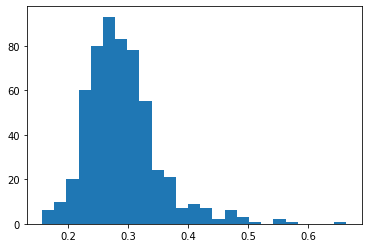

In [42]:
plt.hist(df['symmetry_worst'], 25)

(array([ 20.,  52.,  98., 105.,  93.,  52.,  45.,  36.,  23.,   8.,  12.,
         10.,   5.,   3.,   4.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.]),
 array([0.05504  , 0.0611384, 0.0672368, 0.0733352, 0.0794336, 0.085532 ,
        0.0916304, 0.0977288, 0.1038272, 0.1099256, 0.116024 , 0.1221224,
        0.1282208, 0.1343192, 0.1404176, 0.146516 , 0.1526144, 0.1587128,
        0.1648112, 0.1709096, 0.177008 , 0.1831064, 0.1892048, 0.1953032,
        0.2014016, 0.2075   ]),
 <a list of 25 Patch objects>)

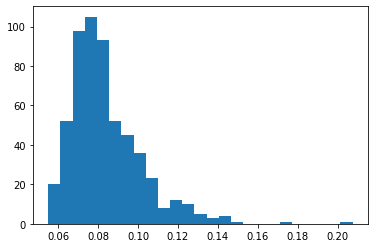

In [43]:
plt.hist(df['fractal_dimension_worst'], 25)

In [44]:
def getDistributions(df_column):
    dist = {
        "normal":likelihood_normal(df_column),
        "rayleigh":likelihood_rayleigh(df_column)
    }
    return {k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}

In [45]:
getDistributions(df['symmetry_worst'])

NameError: name 'likelihood_rayleigh' is not defined

In [ ]:
df1 = df.drop('diagnosis', 1)

In [46]:
df2 = df1.apply(getDistributions, axis=0)

NameError: name 'df1' is not defined

In [47]:
df2.head()

NameError: name 'df2' is not defined

<Figure size 432x288 with 0 Axes>

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'radius_mean\nnormal')

(array([ 17.,  96., 154., 145.,  89.,  40.,  21.,   4.,   2.,   1.]),
 array([ 9.71 , 12.667, 15.624, 18.581, 21.538, 24.495, 27.452, 30.409,
        33.366, 36.323, 39.28 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'texture_mean\nnormal')

(array([ 15.,  93., 185., 116.,  62.,  49.,  34.,   8.,   3.,   4.]),
 array([ 43.79 ,  58.261,  72.732,  87.203, 101.674, 116.145, 130.616,
        145.087, 159.558, 174.029, 188.5  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'perimeter_mean\nnormal')

(array([ 93., 251., 101.,  47.,  51.,  14.,   6.,   3.,   1.,   2.]),
 array([ 143.5 ,  379.25,  615.  ,  850.75, 1086.5 , 1322.25, 1558.  ,
        1793.75, 2029.5 , 2265.25, 2501.  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'area_mean\nrayleigh')

(array([  2.,  26., 110., 160., 164.,  79.,  20.,   5.,   2.,   1.]),
 array([0.05263 , 0.063707, 0.074784, 0.085861, 0.096938, 0.108015,
        0.119092, 0.130169, 0.141246, 0.152323, 0.1634  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'smoothness_mean\nnormal')

(array([ 68., 182., 133.,  87.,  48.,  26.,  15.,   5.,   4.,   1.]),
 array([0.01938 , 0.051982, 0.084584, 0.117186, 0.149788, 0.18239 ,
        0.214992, 0.247594, 0.280196, 0.312798, 0.3454  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'compactness_mean\nrayleigh')

(array([217., 122.,  86.,  63.,  34.,  25.,   6.,   9.,   4.,   3.]),
 array([0.     , 0.04268, 0.08536, 0.12804, 0.17072, 0.2134 , 0.25608,
        0.29876, 0.34144, 0.38412, 0.4268 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'concavity_mean\nnormal')

(array([139., 174.,  76.,  57.,  66.,  23.,  15.,  12.,   2.,   5.]),
 array([0.     , 0.02012, 0.04024, 0.06036, 0.08048, 0.1006 , 0.12072,
        0.14084, 0.16096, 0.18108, 0.2012 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'concave points_mean\nnormal')

(array([  5.,  35., 133., 164., 136.,  60.,  21.,  10.,   3.,   2.]),
 array([0.106 , 0.1258, 0.1456, 0.1654, 0.1852, 0.205 , 0.2248, 0.2446,
        0.2644, 0.2842, 0.304 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'symmetry_mean\nnormal')

(array([ 41., 160., 175., 101.,  51.,  25.,   9.,   2.,   1.,   4.]),
 array([0.04996 , 0.054708, 0.059456, 0.064204, 0.068952, 0.0737  ,
        0.078448, 0.083196, 0.087944, 0.092692, 0.09744 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'fractal_dimension_mean\nnormal')

(array([357., 137.,  44.,  24.,   4.,   1.,   0.,   0.,   1.,   1.]),
 array([0.1115 , 0.38765, 0.6638 , 0.93995, 1.2161 , 1.49225, 1.7684 ,
        2.04455, 2.3207 , 2.59685, 2.873  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'radius_se\nrayleigh')

(array([129., 220., 136.,  52.,  18.,   9.,   1.,   3.,   0.,   1.]),
 array([0.3602 , 0.81268, 1.26516, 1.71764, 2.17012, 2.6226 , 3.07508,
        3.52756, 3.98004, 4.43252, 4.885  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'texture_se\nrayleigh')

(array([378., 131.,  32.,  20.,   6.,   0.,   0.,   0.,   1.,   1.]),
 array([ 0.757 ,  2.8793,  5.0016,  7.1239,  9.2462, 11.3685, 13.4908,
        15.6131, 17.7354, 19.8577, 21.98  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'perimeter_se\nrayleigh')

(array([466.,  73.,  22.,   4.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([  6.802 ,  60.3418, 113.8816, 167.4214, 220.9612, 274.501 ,
        328.0408, 381.5806, 435.1204, 488.6602, 542.2   ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'area_se\nrayleigh')

(array([ 96., 299., 120.,  34.,  13.,   3.,   2.,   1.,   0.,   1.]),
 array([0.001713 , 0.0046547, 0.0075964, 0.0105381, 0.0134798, 0.0164215,
        0.0193632, 0.0223049, 0.0252466, 0.0281883, 0.03113  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'smoothness_se\nrayleigh')

(array([200., 187., 105.,  39.,  19.,   7.,   7.,   4.,   0.,   1.]),
 array([0.002252 , 0.0155668, 0.0288816, 0.0421964, 0.0555112, 0.068826 ,
        0.0821408, 0.0954556, 0.1087704, 0.1220852, 0.1354   ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'compactness_se\nrayleigh')

(array([412., 128.,  22.,   5.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([0.    , 0.0396, 0.0792, 0.1188, 0.1584, 0.198 , 0.2376, 0.2772,
        0.3168, 0.3564, 0.396 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'concavity_se\nnormal')

(array([ 51., 219., 186.,  74.,  25.,   8.,   3.,   2.,   0.,   1.]),
 array([0.      , 0.005279, 0.010558, 0.015837, 0.021116, 0.026395,
        0.031674, 0.036953, 0.042232, 0.047511, 0.05279 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'concave points_se\nnormal')

(array([137., 264., 103.,  38.,  14.,   5.,   5.,   2.,   0.,   1.]),
 array([0.007882 , 0.0149888, 0.0220956, 0.0292024, 0.0363092, 0.043416 ,
        0.0505228, 0.0576296, 0.0647364, 0.0718432, 0.07895  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'symmetry_se\nnormal')

(array([361., 158.,  32.,  11.,   3.,   1.,   0.,   2.,   0.,   1.]),
 array([0.0008948 , 0.00378932, 0.00668384, 0.00957836, 0.01247288,
        0.0153674 , 0.01826192, 0.02115644, 0.02405096, 0.02694548,
        0.02984   ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'fractal_dimension_se\nrayleigh')

(array([ 34., 160., 167.,  69.,  53.,  47.,  22.,   9.,   7.,   1.]),
 array([ 7.93 , 10.741, 13.552, 16.363, 19.174, 21.985, 24.796, 27.607,
        30.418, 33.229, 36.04 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'radius_worst\nnormal')

(array([ 16.,  80., 123., 131., 100.,  75.,  28.,  11.,   3.,   2.]),
 array([12.02 , 15.772, 19.524, 23.276, 27.028, 30.78 , 34.532, 38.284,
        42.036, 45.788, 49.54 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'texture_worst\nnormal')

(array([ 43., 178., 151.,  77.,  45.,  44.,  18.,   7.,   5.,   1.]),
 array([ 50.41 ,  70.489,  90.568, 110.647, 130.726, 150.805, 170.884,
        190.963, 211.042, 231.121, 251.2  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'perimeter_worst\nnormal')

(array([223., 193.,  58.,  51.,  25.,  10.,   4.,   4.,   0.,   1.]),
 array([ 185.2 ,  592.08,  998.96, 1405.84, 1812.72, 2219.6 , 2626.48,
        3033.36, 3440.24, 3847.12, 4254.  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'area_worst\nrayleigh')

(array([  5.,  43.,  93., 150., 143.,  78.,  34.,  19.,   1.,   3.]),
 array([0.07117 , 0.086313, 0.101456, 0.116599, 0.131742, 0.146885,
        0.162028, 0.177171, 0.192314, 0.207457, 0.2226  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'smoothness_worst\nnormal')

(array([117., 200., 108.,  84.,  27.,  17.,   8.,   3.,   4.,   1.]),
 array([0.02729 , 0.130361, 0.233432, 0.336503, 0.439574, 0.542645,
        0.645716, 0.748787, 0.851858, 0.954929, 1.058   ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'compactness_worst\nrayleigh')

(array([157., 151., 109.,  72.,  38.,  28.,   7.,   4.,   1.,   2.]),
 array([0.    , 0.1252, 0.2504, 0.3756, 0.5008, 0.626 , 0.7512, 0.8764,
        1.0016, 1.1268, 1.252 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'concavity_worst\nnormal')

(array([ 43.,  72., 130.,  87.,  54.,  63.,  55.,  34.,  20.,  11.]),
 array([0.    , 0.0291, 0.0582, 0.0873, 0.1164, 0.1455, 0.1746, 0.2037,
        0.2328, 0.2619, 0.291 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'concave points_worst\nnormal')

(array([ 23., 153., 219., 114.,  35.,  11.,   9.,   3.,   1.,   1.]),
 array([0.1565 , 0.20723, 0.25796, 0.30869, 0.35942, 0.41015, 0.46088,
        0.51161, 0.56234, 0.61307, 0.6638 ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'symmetry_worst\nnormal')

(array([123., 245., 113.,  51.,  25.,   9.,   1.,   1.,   0.,   1.]),
 array([0.05504 , 0.070286, 0.085532, 0.100778, 0.116024, 0.13127 ,
        0.146516, 0.161762, 0.177008, 0.192254, 0.2075  ]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'fractal_dimension_worst\nnormal')

<Figure size 432x288 with 0 Axes>

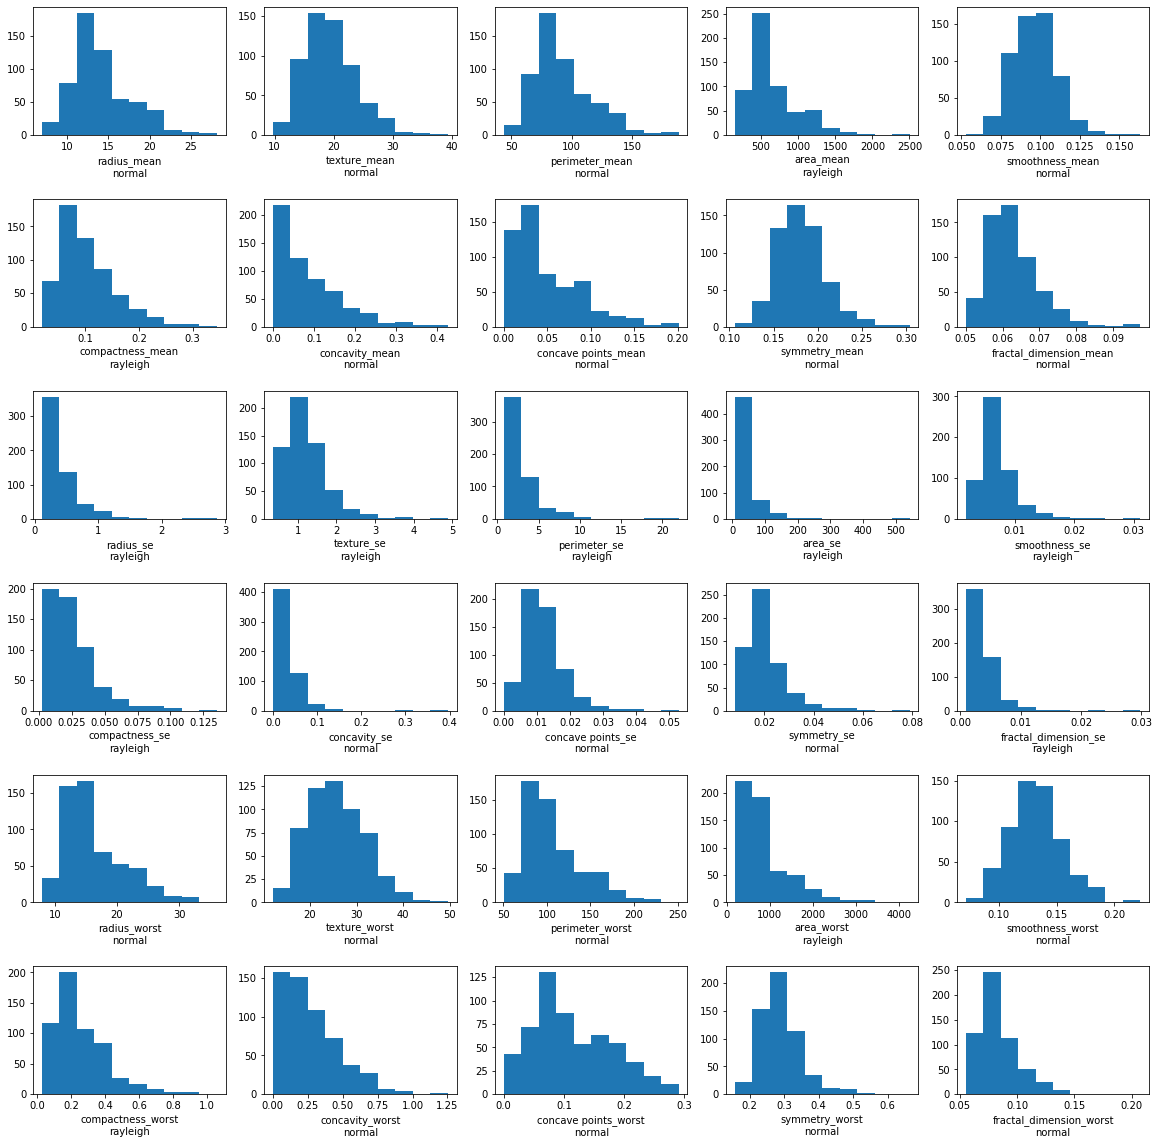

In [48]:
plt.figure()
#fig.set_size_inches(18.5, 10.5)
linear_data = np.array([1,2,3,4,5,6,7,8])
fig, axises = plt.subplots(6, 5, sharex=False, sharey=False)
fig.set_size_inches(20, 20)
fig.subplots_adjust(hspace=.5)

count = 1

for i in range(0,6):
    for j in range(0,5):
        column_name = df.columns[count]
        axises[i][j].hist(df[column_name])
        axises[i][j].set_xlabel(column_name + "\n" +getDistributionName(df[column_name]))
        count = count + 1
    
#axises[0][0].hist(df['symmetry_worst'])
#axises[0][0].set_xlabel('symmetry_worst')


#for i in range(0,32):
#    axises[i].plot(df[df.columns(i)], 25)